# La regresión lineal simple

En Python, hay varias bibliotecas que te permiten realizar una regresión lineal. A continuación, te menciono algunas de las librerías más populares:

1. **NumPy**: NumPy es una biblioteca fundamental para operaciones numéricas en Python. Puede ser utilizada para implementar regresión lineal simple y múltiple, así como otras técnicas de análisis numérico.

2. **SciPy**: SciPy es una extensión de NumPy y ofrece muchas más funcionalidades para ciencias e ingeniería. Incluye funciones para realizar regresiones lineales y no lineales.

3. **scikit-learn**: Es una biblioteca de aprendizaje automático (machine learning) que contiene muchas herramientas para tareas de minería de datos. Proporciona una implementación fácil y rápida de regresión lineal y otros modelos de aprendizaje automático.

4. **statsmodels**: Esta biblioteca se enfoca en estadísticas y ofrece una gran cantidad de herramientas para el análisis de datos. Proporciona una interfaz más completa para realizar análisis de regresión lineal con más detalles estadísticos.

5. **TensorFlow y Keras**: Estas bibliotecas son ampliamente utilizadas para el aprendizaje profundo (deep learning), pero también se pueden utilizar para realizar regresiones lineales.

6. **PyTorch**: Al igual que TensorFlow y Keras, PyTorch es una biblioteca de aprendizaje profundo que también puede usarse para tareas de regresión lineal.

Para la mayoría de las tareas sencillas de regresión lineal, scikit-learn y statsmodels son las bibliotecas más populares debido a su facilidad de uso y ricas funcionalidades. Si buscas algo más específico para análisis estadístico, statsmodels puede ser más adecuado, mientras que scikit-learn es más versátil para tareas de aprendizaje automático en general. NumPy y SciPy son útiles para aquellos que deseen implementar directamente el algoritmo de regresión lineal desde cero o para tareas numéricas más generales. TensorFlow, Keras y PyTorch son más apropiados para casos donde se requiere el uso de técnicas de aprendizaje profundo además de la regresión lineal.

Para este ejercicio se decidió usar statsmodels por su comodidad en la forma de presentación de los resultados de forma conjunta como lo hacen otros softwares especializados como STATA, etc...

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Se importa statsmodels

import statsmodels.api as sm
import statsmodels.formula.api as smf

Para poder descargar los datos de Wooldridge se usara la librería "wooldridge"

In [2]:
import wooldridge as woo

De la siguiente forma se obtiene la base de datos y posteriormente se separan las variables según corresponde

In [3]:
Data = woo.dataWoo("ceosal1")
Data.head()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894


In [4]:
y = Data["salary"]
y.head()

0    1095
1    1001
2    1122
3     578
4    1368
Name: salary, dtype: int64

In [5]:
x = Data["roe"]
x.head()

0    14.1
1    10.9
2    23.5
3     5.9
4    13.8
Name: roe, dtype: float64

Para comprender los datos es una buena practica visualizar los datos en una gráfica

Text(0.5, 1.0, 'Salary VS ROE')

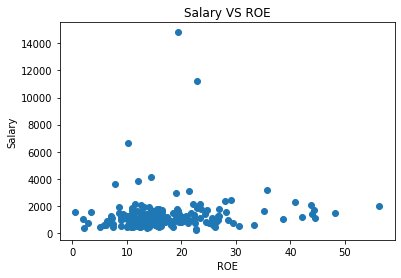

In [6]:
PLOT = plt.subplot()
PLOT.scatter(x=x, y=y)
PLOT.set_ylabel("Salary")
PLOT.set_xlabel("ROE")
PLOT.set_title("Salary VS ROE")

De este punto en delante el proceso se llevara a cabo con la librería Statsmodels


In [21]:
x = sm.add_constant(x)

Mod = sm.OLS(endog= y ,exog= x)

Mod_Res = Mod.fit()

print(Mod_Res.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Sun, 23 Jul 2023   Prob (F-statistic):             0.0978
Time:                        15:26:27   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        963.1913    213.240      4.517      0.0

A continuación, te proporciono una interpretación detallada de cada uno de los parámetros resultantes del modelo de regresión lineal:

1. **Dep. Variable (Variable dependiente)**: El nombre de la variable dependiente en el modelo. En este caso, es "salary", lo que indica que estamos tratando de predecir o explicar la variable "salary" utilizando la variable "roe".

2. **R-squared (R^2)**: El coeficiente de determinación (R^2) es una medida que indica la proporción de la variabilidad total de la variable dependiente ("salary") que es explicada por el modelo. En este caso, el valor de R^2 es 0.013, lo que significa que solo aproximadamente el 1.3% de la variabilidad en "salary" es explicada por la variable "roe" en el modelo de regresión.

3. **Adj. R-squared (R^2 ajustado)**: Es una versión corregida del R^2 que toma en cuenta el número de variables predictoras en el modelo. El valor de R^2 ajustado es 0.008, lo que indica que este modelo, que incluye la variable "roe", no mejora significativamente la capacidad de explicar la variabilidad de "salary" en comparación con un modelo sin variables predictoras.

4. **Method (Método)**: Es el método utilizado para ajustar el modelo. En este caso, se utilizó el método de Mínimos Cuadrados Ordinarios (OLS, por sus siglas en inglés) para realizar el ajuste de la regresión lineal.

5. **Date (Fecha)**: La fecha en la que se realizó el ajuste del modelo.

6. **Time (Hora)**: La hora en la que se realizó el ajuste del modelo.

7. **F-statistic**: La estadística F es una medida global de la significancia del modelo en su conjunto. Un valor alto de F-statistic sugiere que al menos una de las variables predictoras es significativa en la explicación de la variable dependiente. En este caso, el valor de F-statistic es 2.767.

8. **Prob (F-statistic)**: Es el valor p asociado al F-statistic. En este caso, el valor p es 0.0978, lo que sugiere que el modelo no es significativo en su conjunto a un nivel de significancia del 0.05, ya que el valor p es mayor que este nivel.

9. **No. Observations (Número de observaciones)**: El número de observaciones en el conjunto de datos. En este caso, hay 209 observaciones.

10. **Df Residuals (Grados de libertad residuales)**: Los grados de libertad residuales representan el número de observaciones menos el número de parámetros estimados en el modelo. En este caso, hay 207 grados de libertad residuales.

11. **Df Model (Grados de libertad del modelo)**: El número de variables predictoras en el modelo, que en este caso es 1 (la variable "roe").

12. **Covariance Type (Tipo de covarianza)**: El tipo de covarianza utilizado para calcular los errores estándar. En este caso, se utilizó "nonrobust", lo que significa que los errores estándar no fueron ajustados para problemas de heterocedasticidad o autocorrelación.

13. **const (Término constante o intercept)**: Es el coeficiente asociado al término constante (intercept) en el modelo de regresión. En este caso, el valor del coeficiente es 963.1913.

14. **roe (Coeficiente de la variable predictora)**: Es el coeficiente asociado a la variable predictora "roe" en el modelo de regresión. En este caso, el valor del coeficiente es 18.5012.

15. **std err (Error estándar)**: Representa la precisión del estimado de cada coeficiente. Un valor más pequeño indica una estimación más precisa. Los errores estándar más grandes indican mayor incertidumbre en el valor del coeficiente.

16. **t (Valor t)**: Es la relación entre el coeficiente estimado y su error estándar. Se utiliza para calcular el valor p y determinar la significancia estadística de cada coeficiente. Valores de t más grandes indican que el coeficiente es más significativo.

El valor t es la relación entre el coeficiente estimado y su error estándar. Se utiliza para calcular el valor p y determinar la significancia estadística de cada coeficiente. Un valor t más grande indica que el coeficiente es más significativo. En este caso, el valor t para la constante es 4.517 y para la variable "roe" es 1.663. Un valor t de 4.517 para la constante significa que el coeficiente es significativamente diferente de cero, lo que indica que el término constante (intercept) es significativo en el modelo. Para la variable "roe", el valor t de 1.663 también sugiere que el coeficiente es significativamente diferente de cero, aunque en menor medida que el término constante.

17. **P>|t| (Valor p)**: Es el valor p asociado al valor t. Un valor p menor que el nivel de significancia (generalmente 0.05) indica que el coeficiente es significativo en la explicación de la variable dependiente.

El valor p asociado al valor t es una medida de la significancia estadística de cada coeficiente. Un valor p menor que el nivel de significancia (generalmente 0.05) indica que el coeficiente es significativo en la explicación de la variable dependiente. En este caso, el valor p para la constante es 0.000 (muy pequeño) y para la variable "roe" es 0.098. Un valor p de 0.000 para la constante significa que el término constante es altamente significativo en el modelo. Para la variable "roe", el valor p de 0.098 es mayor que 0.05, lo que sugiere que la variable "roe" no es significativa a un nivel de significancia del 0.05.

18. **[0.025      0.975] (Intervalo de confianza)**: Estos valores representan el intervalo de confianza del 95% para cada coeficiente. Es el rango en el que se espera que se encuentre el verdadero valor del coeficiente con un 95% de confianza.

Estos valores representan el intervalo de confianza del 95% para cada coeficiente. Es el rango en el que se espera que se encuentre el verdadero valor del coeficiente con un 95% de confianza. En este caso, el intervalo de confianza para la constante es [542.790, 1383.592], lo que significa que con un 95% de confianza, se espera que el verdadero valor del coeficiente de la constante esté en ese rango. Del mismo modo, el intervalo de confianza para la variable "roe" es [-3.428, 40.431], lo que indica que con un 95% de confianza, se espera que el verdadero valor del coeficiente de la variable "roe" esté en ese rango.

19. **Omnibus**: Es una prueba estadística para la normalidad de los residuos. Un valor pequeño de este estadístico sugiere que los residuos no siguen una distribución normal.

La prueba estadística Omnibus evalúa la normalidad de los residuos. Un valor pequeño de este estadístico sugiere que los residuos no siguen una distribución normal. En este caso, el valor de Omnibus es 311.096, lo que indica que los residuos no siguen una distribución normal.

20. **Prob(Omnibus)**: Es el valor p asociado al estadístico Omnibus. Valores bajos sugieren que los residuos no siguen una distribución normal.

Es el valor p asociado al estadístico Omnibus. Valores bajos sugieren que los residuos no siguen una distribución normal. En este caso, el valor p asociado al estadístico Omnibus es 0.000 (muy pequeño), lo que refuerza la evidencia de que los residuos no siguen una distribución normal.

21. **Jarque-Bera (JB)**: Es otra prueba de normalidad de los residuos. Un valor alto de este estadístico indica desviación de la normalidad.

El estadístico Jarque-Bera es otra prueba de normalidad de los residuos. Un valor alto de este estadístico indica desviación de la normalidad. En este caso, el valor de Jarque-Bera es 31120.902, lo que sugiere una fuerte desviación de la normalidad de los residuos.

22. **Prob(JB)**: Es el valor p asociado al estadístico Jarque-Bera.

Es el valor p asociado al estadístico Jarque-Bera. Valores bajos sugieren una desviación significativa de la normalidad de los residuos. En este caso, el valor p asociado al estadístico Jarque-Bera es 0.000 (muy pequeño), lo que refuerza la evidencia de una desviación significativa de la normalidad de los residuos.

23. **Skew (Sesgo)**: Representa el sesgo de los residuos. Un valor cercano a cero indica que los residuos tienen simetría.

Es el valor p asociado al estadístico Jarque-Bera. Valores bajos sugieren una desviación significativa de la normalidad de los residuos. En este caso, el valor p asociado al estadístico Jarque-Bera es 0.000 (muy pequeño), lo que refuerza la evidencia de una desviación significativa de la normalidad de los residuos.

24. **Kurtosis**: Representa la curtosis (apuntamiento) de los residuos. Un valor alto indica que los residuos tienen colas pesadas.

La curtosis representa la concentración de los residuos en torno a la media. Un valor alto indica que los residuos tienen colas pesadas. En este caso, el valor de curtosis es 61.158, lo que sugiere que los residuos tienen colas pesadas y una distribución muy apuntada.

25. **Cond. No. (Número de condición)**: Es una medida de multicolinealidad. Valores altos indican alta multicolinealidad en el modelo.

El número de condición es una medida de multicolinealidad. Valores altos indican alta multicolinealidad en el modelo. En este caso, el valor de número de condición es 43.3, lo que sugiere que no hay problemas de multicolinealidad en el modelo.

*En resumen, estos resultados estadísticos te proporcionan información sobre la significancia de cada coeficiente en el modelo de regresión, la calidad de ajuste y la normalidad de los residuos. Es importante prestar especial atención a los valores de significancia (valor p) y el intervalo de confianza para determinar la importancia y precisión de cada coeficiente en la explicación de la variable dependiente. También, los resultados de normalidad y multicolinealidad son útiles para evaluar la validez del modelo. En este caso, parece que el modelo tiene problemas de normalidad y los coeficientes de la variable "roe" no son significativos a un nivel de significancia del 0.05.*

En resumen, el modelo de regresión muestra el ajuste y las características estadísticas del modelo, incluidos los coeficientes, errores estándar, valores t y valores p para cada variable predictora. También proporciona información sobre la calidad del ajuste y la significancia global del modelo. Además, se presentan pruebas de normalidad y multicolinealidad de los residuos. Es importante considerar la significancia estadística de los coeficientes y la calidad del ajuste al interpretar los resultados del modelo.

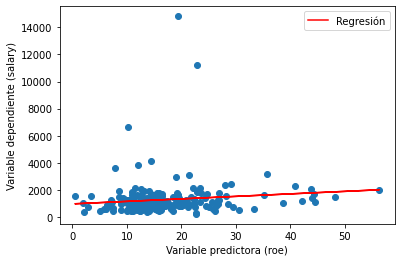

In [27]:
# Obtener los coeficientes del modelo ajustado
coef_constante, coef_roe = Mod_Res.params

# Graficar los datos y la línea de regresión
plt.scatter(x['roe'], y)
plt.plot(x['roe'], coef_constante + coef_roe * np.array(x['roe']), color='red', label='Regresión')
plt.xlabel('Variable predictora (roe)')
plt.ylabel('Variable dependiente (salary)')
plt.legend()
plt.show()